# Home Assignment 1: Deep Learning from Scratch

**Authors:** Yoav Elem and Amir Solimani

## Introduction

In this assignment, we will be implementing deep learning algorithms from scratch. Before we begin, let's set up our environment by downloading the necessary packages and performing the required imports.

In [1]:
!pip install -r requirements.txt

In [1]:
from layers import ReLULayer, TanhLayer
from losses import LinearLayer, SoftmaxLayer
from neural_network import GenericNetwork
from utils import plot_loss_and_accuracy, plot_data, SGD, Gradient_test, JacobianTest

import numpy as np
import matplotlib.pyplot as plt
import scipy.io


# Set numpy print options
np.set_printoptions(precision=10, suppress=True)

# Load the datasets
swiss_roll =scipy.io.loadmat('HW1_Data(1)/SwissRollData.mat')
peaks =scipy.io.loadmat('HW1_Data(1)/PeaksData.mat')
gmm = scipy.io.loadmat('HW1_Data(1)/GMMData.mat')
sample_data = scipy.io.loadmat('HW1_Data(1)/SampleData.mat')

## 2.1.1 Softmax Layer and Gradient Test

In this section, we created the softmax loss layer. The code for the implementation of the layer and the gradient test can be found [here](losses.py).

We will now demonstrate that the layer passes the gradient test.

More specifically, we will generate a random vector $ \mathbf{d} $ where $ \|\mathbf{d}\| = 1 $. We will test the following:

- **First Order Error**: $ \|\text{softmax}(\mathbf{x} + \epsilon \mathbf{d}) - \text{softmax}(\mathbf{x})\| $

- **Second Order Error**: $ \|\text{softmax}(\mathbf{x} + \epsilon \mathbf{d}) - \text{softmax}(\mathbf{x}) - \epsilon \mathbf{d}^\top \nabla_\mathbf{x} \text{softmax}(\mathbf{x})\| $

The decay of epsilon is defined by the formula: $ \epsilon_t = 0.5^t $. In our plots, the x-axis represents the value of $ t $, and the y-axis shows the error measured in both first and second order errors.
note that the errors are presented in log-scale

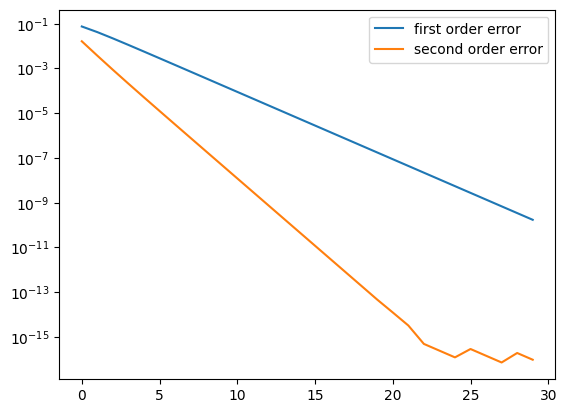

In [2]:
softmax_layer = SoftmaxLayer(4, 4)
x = np.random.rand(4, 1)
y = np.array([[0, 0, 1, 0]]).T

# Tests the gradient of the softmax layer as presented in the notes
Gradient_test(softmax_layer, x, y)

# 2.1.2 Minimizing an SGD Objective Function

## Overview
In this task, we delve into the implementation and application of Stochastic Gradient Descent (SGD) for optimizing a specific objective function. The goal is to demonstrate the effectiveness of SGD in practical scenarios.

## Task Description
We will be coding an SGD algorithm and showcasing its operational success. As recommended in our class, the approach involves creating a linear classifier that aims to approximate the identity function. This is formulated as:

$$
Wx + b = x
$$

Here, $x$ is a randomly sampled vector, and we seek to find the weights $W$ and bias $b$ such that the output mirrors the identity function. The key component of this task is the utilization of a linear layer, which is intricately linked with a loss function, thereby classifying it as a loss layer.

The SGD optimization will be performed with a learning rate $\text{lr} = 5 \times 10^{-3}$, adhering to the SGD methodology presented in class. 

For details on the implementation of the SGD function, please refer to [this link](neural_network.py). We will be using a neural network model, as outlined [here](neural_network.py). The generic SGD we created is designed to operate within a neural network context, but for this task, we will configure it as a single-layer linear neural network. This adaptation makes it perfectly suitable for our objective of approximating the identity function.


Epoch 0, training loss: 1.5896764573091084
Epoch 0, training accuracy: 1.0
Epoch 0, validation loss: 1.5896764573091084
Epoch 0, validation accuracy: 1.0
Epoch 1, training loss: 1.5219746789628428
Epoch 1, training accuracy: 1.0
Epoch 1, validation loss: 1.5219746789628428
Epoch 1, validation accuracy: 1.0
Epoch 2, training loss: 1.4571562110978846
Epoch 2, training accuracy: 1.0
Epoch 2, validation loss: 1.4571562110978846
Epoch 2, validation accuracy: 1.0
Epoch 3, training loss: 1.39509825813139
Epoch 3, training accuracy: 1.0
Epoch 3, validation loss: 1.39509825813139
Epoch 3, validation accuracy: 1.0
Epoch 4, training loss: 1.3356832541480312
Epoch 4, training accuracy: 1.0
Epoch 4, validation loss: 1.3356832541480312
Epoch 4, validation accuracy: 1.0
Epoch 5, training loss: 1.2787986401768219
Epoch 5, training accuracy: 1.0
Epoch 5, validation loss: 1.2787986401768219
Epoch 5, validation accuracy: 1.0
Epoch 6, training loss: 1.2243366509533617
Epoch 6, training accuracy: 1.0
Epoch

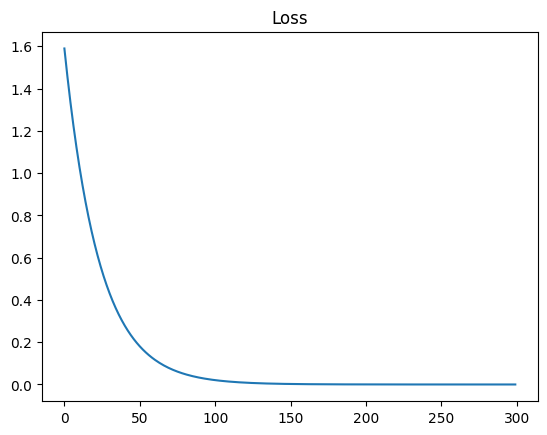

In [3]:
# define learning rate
lr = 5e-3

# generate a random input vector
x = np.random.rand(3, 1)

# define the target vector
y = x

# define the linear layer
linear_layer = GenericNetwork(LinearLayer(3, 3)) 

# Run the SGD algorithm
loss, _, _, _ = SGD(x, y, x, y, linear_layer, lr, epochs=300)

# plot the loss
plt.plot(loss)
plt.title('Loss')
plt.show()

### 2.1.3 Task Description

In this task, we are required to demonstrate the minimization of the softmax layer we created on a dataset using the SGD variant we developed. To do this, we created a sample dataset with the following characteristics:

- The datapoints are $(a, b)$ points on the plane, divided into 4 classes:
  - Class 0: if $a \ge 0$ and $b \ge 0$.
  - Class 1: if $a < 0$ and $b > 0$.
  - Class 2: if $a < 0$ and $b < 0$.
  - Class 3: if $a > 0$ and $b < 0$.

Since the softmax layer is a linear classifier, we had to ensure the dataset is linearly separable. To learn the dataset, we implemented the softmax layer. Note that we created a neural network with a single layer, which is the softmax layer, as our SGD implementation is designed to work on a network rather than an individual layer. In practice, there is no difference in computation.
We ran the experiment with 5 epochs on the dataset, each time experimenting with different mini-batch sizes and different learning rates. Below is a 3x3 table to be filled with the results:

| Learning Rate / Mini Batch Size | Size 16 | Size 64 | Size 256 |
|---------------------------------|--------|--------|---------|
| 5e-5                            |     0.75   |    0.59    |     0.61    |
| 5e-3                            |    0.998    |     0.997   |     0.991    |
| 5e-1                            |      0.989  |    0.991    |       0.996  |

The table shows the different accuracies measured at the end of the experiment on the validation set. As observed, the batch size did not have a significant impact. The learning rate of 5e-5 performed poorly, but this is attributed to the limited training duration of only 5 epochs, requiring more time to converge due to its small magnitude. The best result was obtained with a learning rate of 5e-3 and a mini-batch size of 16.


Epoch 0, training loss: 0.23980742060223392
Epoch 0, training accuracy: 0.9953
Epoch 0, validation loss: 0.2400994408507958
Epoch 0, validation accuracy: 0.995
Epoch 1, training loss: 0.186623439599157
Epoch 1, training accuracy: 0.9968
Epoch 1, validation loss: 0.18690224815962997
Epoch 1, validation accuracy: 0.9986
Epoch 2, training loss: 0.16177340776564303
Epoch 2, training accuracy: 0.99785
Epoch 2, validation loss: 0.1622398220993342
Epoch 2, validation accuracy: 0.998
Epoch 3, training loss: 0.14634025177294518
Epoch 3, training accuracy: 0.9985
Epoch 3, validation loss: 0.1467392801340607
Epoch 3, validation accuracy: 1.0
Epoch 4, training loss: 0.1355136129656632
Epoch 4, training accuracy: 0.99775
Epoch 4, validation loss: 0.13586952496432494
Epoch 4, validation accuracy: 0.9982


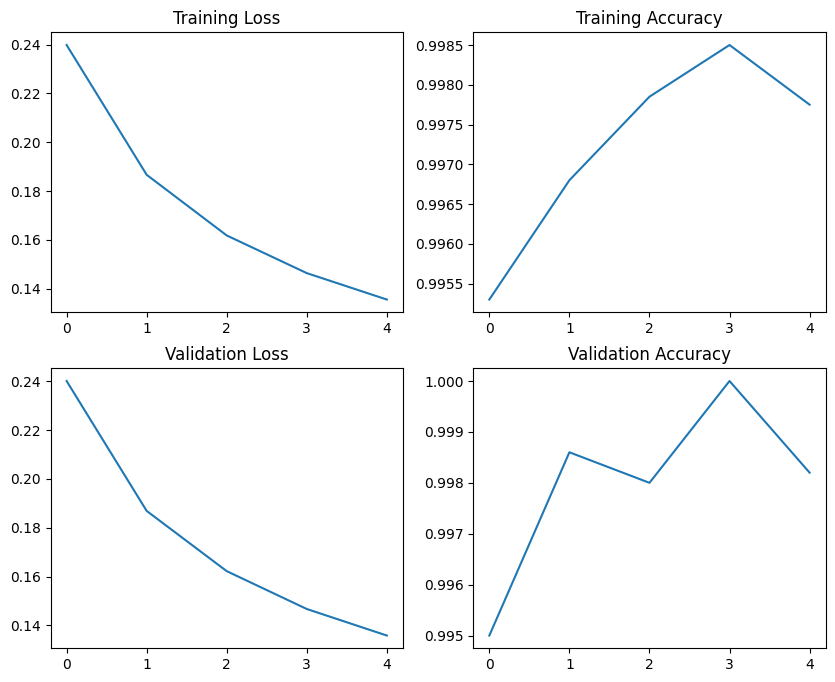

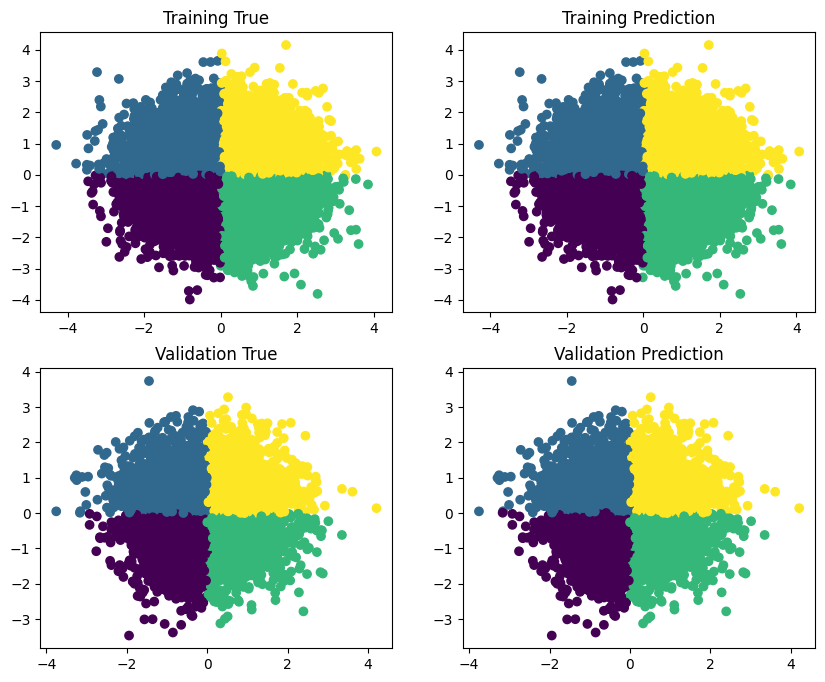

In [4]:
lr = 5e-3
batch_size = 16
dataset = sample_data

Xt = dataset['Yt']
Yt = dataset['Ct']
Xv = dataset['Yv']
Yv = dataset['Cv']

# define the network
network = GenericNetwork(SoftmaxLayer(2, 4))

# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=5)

# plot the loss and accuracy
plot_loss_and_accuracy(tloss, tacc, vloss, vacc)
plot_data(network, Xt, Yt, Xv, Yv)


### Task 2.2.1

In this task, we are required to implement the neural network with the forward and backward pass. The code for the `GenericNetwork` class can be found [here](neural_network.py).

Below we plotted the results of the Jacobian test on the `tanh` layer we created. The implementation of which can be found [here](layers.py).


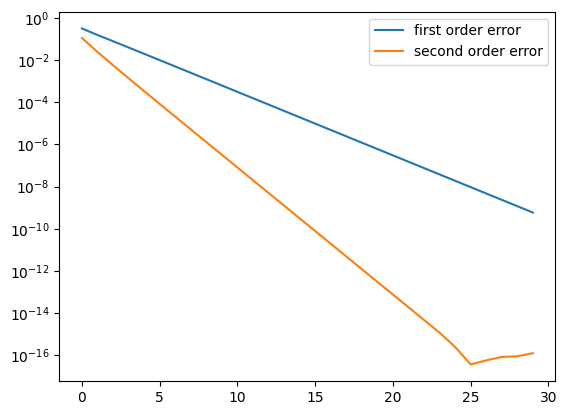

In [5]:
tanh_layer = TanhLayer(2, 2)
x = np.random.rand(2, 1)
JacobianTest(tanh_layer, x)

2.1.4

Epoch 0, training loss: 1.6142180354556916
Epoch 0, training accuracy: 0.44375
Epoch 0, validation loss: 1.6274752836976392
Epoch 0, validation accuracy: 0.4398
Epoch 1, training loss: 1.2487779609593548
Epoch 1, training accuracy: 0.4607
Epoch 1, validation loss: 1.2583057626597198
Epoch 1, validation accuracy: 0.4566


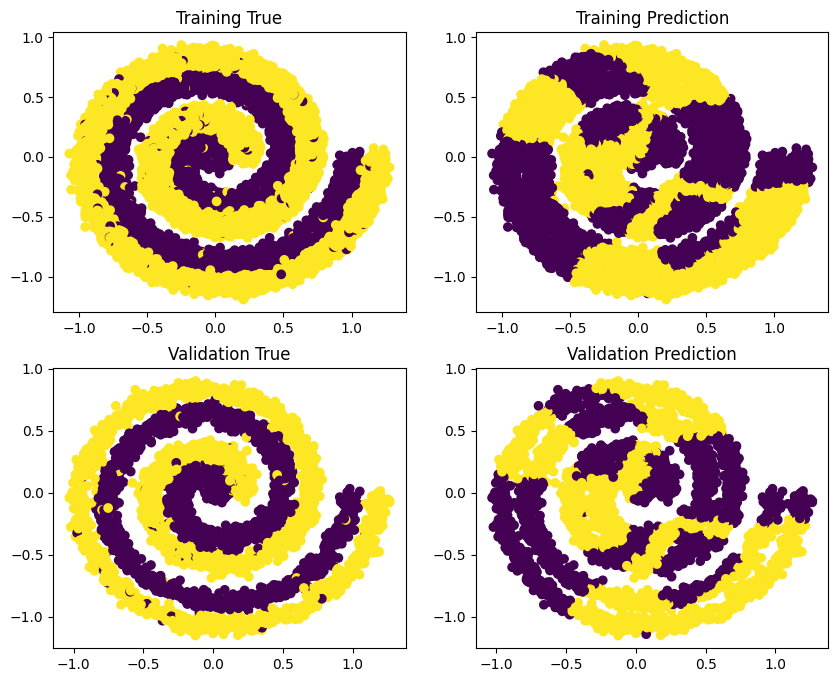

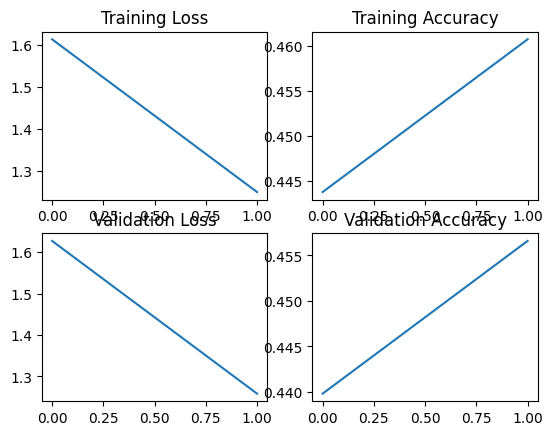

In [6]:
dataset = swiss_roll
Xt = dataset['Yt']
Yt = dataset['Ct']
Xv = dataset['Yv']
Yv = dataset['Cv']
lr = 5e-5

network = GenericNetwork(
SoftmaxLayer(128, 2),
layers = [
    TanhLayer(2, 128),
    TanhLayer(128, 128)
],
)

# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=2)
plot_data(network, Xt, Yt, Xv, Yv)
plot_loss_and_accuracy(tloss, tacc, vloss, vacc)


Epoch 0, training loss: 2.9394552709908677
Epoch 0, training accuracy: 0.70752
Epoch 0, validation loss: 3.2251675640121578
Epoch 0, validation accuracy: 0.70672
Epoch 1, training loss: 2.353309193266487
Epoch 1, training accuracy: 0.72952
Epoch 1, validation loss: 2.623326919507381
Epoch 1, validation accuracy: 0.72432
Epoch 2, training loss: 2.0695663628783163
Epoch 2, training accuracy: 0.75516
Epoch 2, validation loss: 2.3435633047472746
Epoch 2, validation accuracy: 0.74992
Epoch 3, training loss: 1.8632928573204388
Epoch 3, training accuracy: 0.76728
Epoch 3, validation loss: 2.0725969494344816
Epoch 3, validation accuracy: 0.76496
Epoch 4, training loss: 1.6632280944674052
Epoch 4, training accuracy: 0.7994
Epoch 4, validation loss: 1.8705305619112325
Epoch 4, validation accuracy: 0.79312
Epoch 5, training loss: 1.4976494814143118
Epoch 5, training accuracy: 0.80052
Epoch 5, validation loss: 1.674976033036512
Epoch 5, validation accuracy: 0.79536
Epoch 6, training loss: 1.267458

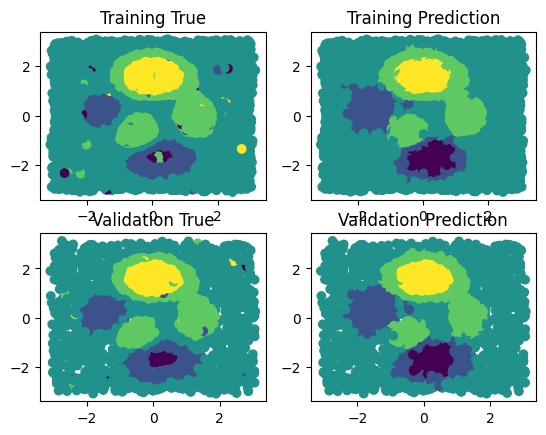

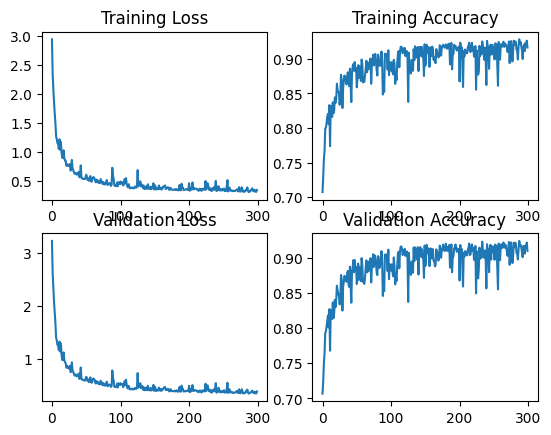

In [8]:
dataset = peaks
Xt = dataset['Yt']
Yt = dataset['Ct']
Xv = dataset['Yv']
Yv = dataset['Cv']
lr = 5e-5

network = GenericNetwork(
SoftmaxLayer(128, 5),
layers = [
    ReLULayer(2, 128),
    ReLULayer(128, 128)
],
)


# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=300)
plot_data(network, Xt, Yt, Xv, Yv)
plot_loss_and_accuracy(tloss, tacc, vloss, vacc)

In [9]:
dataset = gmm
Xt = dataset['Yt']
Yt = dataset['Ct']
Xv = dataset['Yv']
Yv = dataset['Cv']
lr = 5e-5

network = GenericNetwork(
SoftmaxLayer(128, 5),
layers = [
    ReLULayer(5, 128),
    ReLULayer(128, 128)
],
)


# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=300)

Epoch 0, training loss: 4.585608415261058
Epoch 0, training accuracy: 0.68344
Epoch 0, validation loss: 4.541561814515073
Epoch 0, validation accuracy: 0.68256
Epoch 1, training loss: 2.6159042192349116
Epoch 1, training accuracy: 0.80156
Epoch 1, validation loss: 2.616211051562592
Epoch 1, validation accuracy: 0.79696
Epoch 2, training loss: 2.034889566790545
Epoch 2, training accuracy: 0.84776
Epoch 2, validation loss: 2.0369215511106065
Epoch 2, validation accuracy: 0.84384
Epoch 3, training loss: 1.755305915022047
Epoch 3, training accuracy: 0.86812
Epoch 3, validation loss: 1.7877799026290848
Epoch 3, validation accuracy: 0.8616
Epoch 4, training loss: 1.5895197179327325
Epoch 4, training accuracy: 0.881
Epoch 4, validation loss: 1.6159247637777092
Epoch 4, validation accuracy: 0.87664
Epoch 5, training loss: 1.4740179323963174
Epoch 5, training accuracy: 0.89232
Epoch 5, validation loss: 1.5083997919439274
Epoch 5, validation accuracy: 0.88752
Epoch 6, training loss: 1.3939509684

2.2.5

Epoch 0, training loss: 1.736076427332453
Epoch 0, training accuracy: 0.50755
Epoch 0, validation loss: 1.7160601708887901
Epoch 0, validation accuracy: 0.513
Epoch 1, training loss: 1.5200935957890145
Epoch 1, training accuracy: 0.4978
Epoch 1, validation loss: 1.5082175538528368
Epoch 1, validation accuracy: 0.5004
Epoch 2, training loss: 1.3744627685844273
Epoch 2, training accuracy: 0.4985
Epoch 2, validation loss: 1.3677158274532686
Epoch 2, validation accuracy: 0.4984
Epoch 3, training loss: 1.2695583297049693
Epoch 3, training accuracy: 0.5205
Epoch 3, validation loss: 1.2642714448681116
Epoch 3, validation accuracy: 0.5188
Epoch 4, training loss: 1.1875828729998739
Epoch 4, training accuracy: 0.52535
Epoch 4, validation loss: 1.1852445008458283
Epoch 4, validation accuracy: 0.523
Epoch 5, training loss: 1.1204580724491746
Epoch 5, training accuracy: 0.5395
Epoch 5, validation loss: 1.1193117389487826
Epoch 5, validation accuracy: 0.5382
Epoch 6, training loss: 1.063132254538586

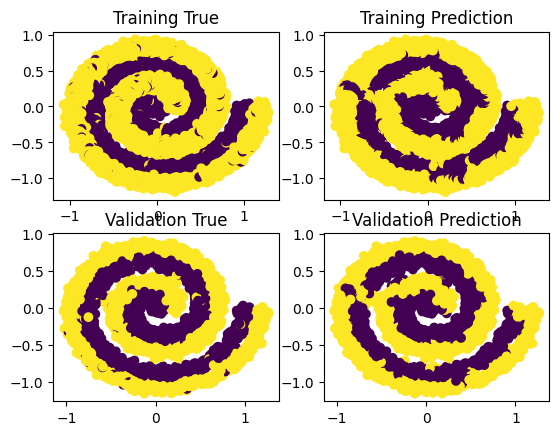

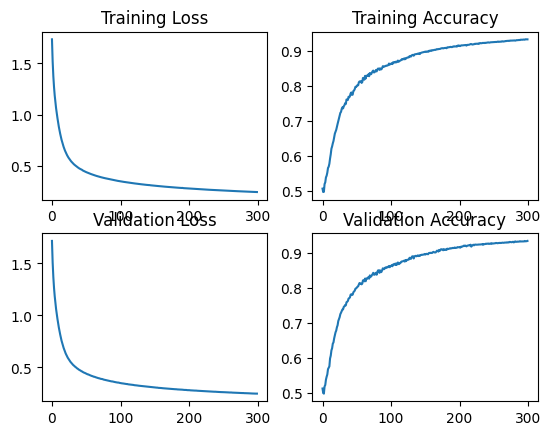

In [10]:
dataset = swiss_roll
Xt = dataset['Yt'][:200]
Yt = dataset['Ct'][:200]
Xv = dataset['Yv']
Yv = dataset['Cv']
lr = 5e-5

network = GenericNetwork(
SoftmaxLayer(128, 2),
layers = [
    TanhLayer(2, 128),
    TanhLayer(128, 128)
],
)

# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=300)
plot_data(network, Xt, Yt, Xv, Yv)
plot_loss_and_accuracy(tloss, tacc, vloss, vacc)

Epoch 0, training loss: 2.8813619112051807
Epoch 0, training accuracy: 0.65348
Epoch 0, validation loss: 2.933363558558204
Epoch 0, validation accuracy: 0.64928
Epoch 1, training loss: 4.002098882059106
Epoch 1, training accuracy: 0.71352
Epoch 1, validation loss: 4.144787749813087
Epoch 1, validation accuracy: 0.70816
Epoch 2, training loss: 2.172483282728978
Epoch 2, training accuracy: 0.7786
Epoch 2, validation loss: 2.2588078273646794
Epoch 2, validation accuracy: 0.76976
Epoch 3, training loss: 1.605056397784242
Epoch 3, training accuracy: 0.78808
Epoch 3, validation loss: 1.656473749398221
Epoch 3, validation accuracy: 0.77824
Epoch 4, training loss: 1.3116880085034495
Epoch 4, training accuracy: 0.80772
Epoch 4, validation loss: 1.340111121237071
Epoch 4, validation accuracy: 0.80784
Epoch 5, training loss: 1.1794796360713045
Epoch 5, training accuracy: 0.83476
Epoch 5, validation loss: 1.2016516870291483
Epoch 5, validation accuracy: 0.83456
Epoch 6, training loss: 1.1064826180

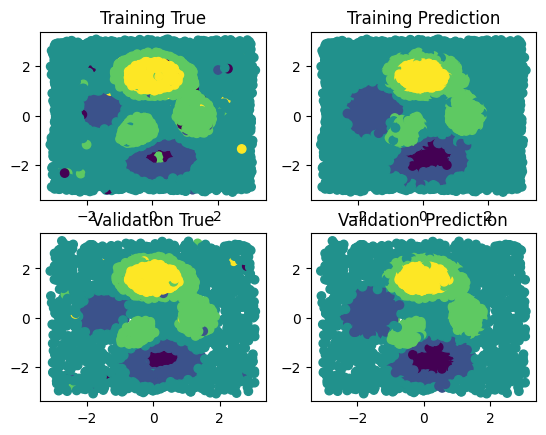

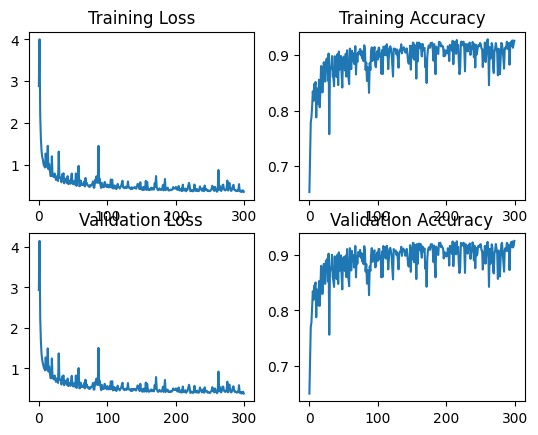

In [11]:
dataset = peaks
Xt = dataset['Yt']
Yt = dataset['Ct']
Xv = dataset['Yv']
Yv = dataset['Cv']
lr = 5e-5

network = GenericNetwork(
SoftmaxLayer(128, 5),
layers = [
    ReLULayer(2, 128),
    ReLULayer(128, 128)
],
)


# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=300)
plot_data(network, Xt, Yt, Xv, Yv)
plot_loss_and_accuracy(tloss, tacc, vloss, vacc)

In [12]:
dataset = gmm
Xt = dataset['Yt']
Yt = dataset['Ct']
Xv = dataset['Yv']
Yv = dataset['Cv']
lr = 5e-5

network = GenericNetwork(
SoftmaxLayer(128, 5),
layers = [
    ReLULayer(5, 128),
    ReLULayer(128, 128)
],
)


# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=300)

Epoch 0, training loss: 3.3621162208163757
Epoch 0, training accuracy: 0.76468
Epoch 0, validation loss: 3.1615386572189363
Epoch 0, validation accuracy: 0.77776
Epoch 1, training loss: 2.4586262825520615
Epoch 1, training accuracy: 0.82376
Epoch 1, validation loss: 2.313490825735433
Epoch 1, validation accuracy: 0.83232
Epoch 2, training loss: 1.992234407240588
Epoch 2, training accuracy: 0.8586
Epoch 2, validation loss: 1.8541495584626653
Epoch 2, validation accuracy: 0.8624
Epoch 3, training loss: 1.7408340621557248
Epoch 3, training accuracy: 0.87648
Epoch 3, validation loss: 1.6288677706361125
Epoch 3, validation accuracy: 0.88192
Epoch 4, training loss: 1.5841646138608465
Epoch 4, training accuracy: 0.88764
Epoch 4, validation loss: 1.4804087813314932
Epoch 4, validation accuracy: 0.89056
Epoch 5, training loss: 1.5028466304362007
Epoch 5, training accuracy: 0.88944
Epoch 5, validation loss: 1.3839770930039592
Epoch 5, validation accuracy: 0.89536
Epoch 6, training loss: 1.396464